In [1]:
#import basic packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Data Description

In [2]:
#load trainign data 
data = pd.read_csv('train.csv')

In [3]:
#display first 5 rows of data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
#Statistical description of all columns
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


1. The house price ranges from 34900  to 755000.
2. The data represents house sold during year 2006-2010.
3. There is a huge difference between 75% and max values in columns - LotArea,MasVnrArea,BstFinSF1,BsmtUnfSF,TotalBsmrSF,
1stFlrSF,2ndFlrSF,GrLiveArea,GarageArea, WoodDeckSF, OpenPorchSF, SalePrice which implies there may be outliers.
4. Very few columns have Mean > Median, that implies data is right skewness
5. There is a huge difference between 75% and max. Hence outliers are present.

In [5]:
#Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

    1. We have to handle missing values in columns like LotFrontage, Alley, BsmtExposure, BsmtFinType2, Alley, MasVnrType,   MasVnrArea, MiscFeature, Fence, PoolQC, PoolArea, GarageCond, GarageQual, GarageFinish, GarageYrBlt, GarageType,FireplaceQu, BmstQual, BmstCond.
    2. All columns with object data type should be converted to integer or float data type.
    3. We can drop ID, PoolQc, MiscFeature and Alley columns as they do not provide much information.

# Data Visualization and Manipulation


Text(0.5, 1, 'Null Value Representation')

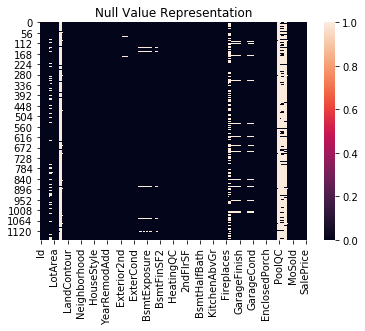

In [6]:
#Heatmap representing null values in the data
sns.heatmap(data.isnull())
plt.title("Null Value Representation")

Text(0.5, 1.0, 'Range of House Prices')

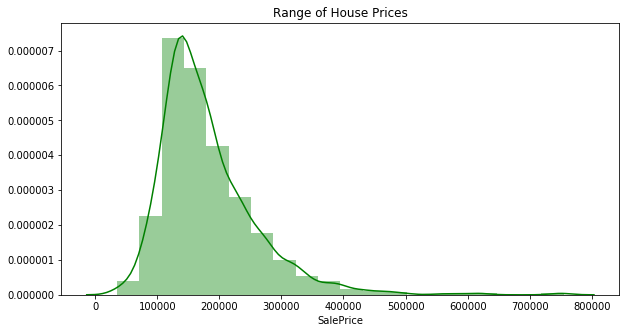

In [7]:
#Distribution of SalePrices
plt.figure(figsize=(10,5))
sns.distplot(data['SalePrice'],bins=20,color='green')
plt.title("Range of House Prices")

    Observation : We can see that, on an average the price of house ranges between 50,000 to 3,00,000.

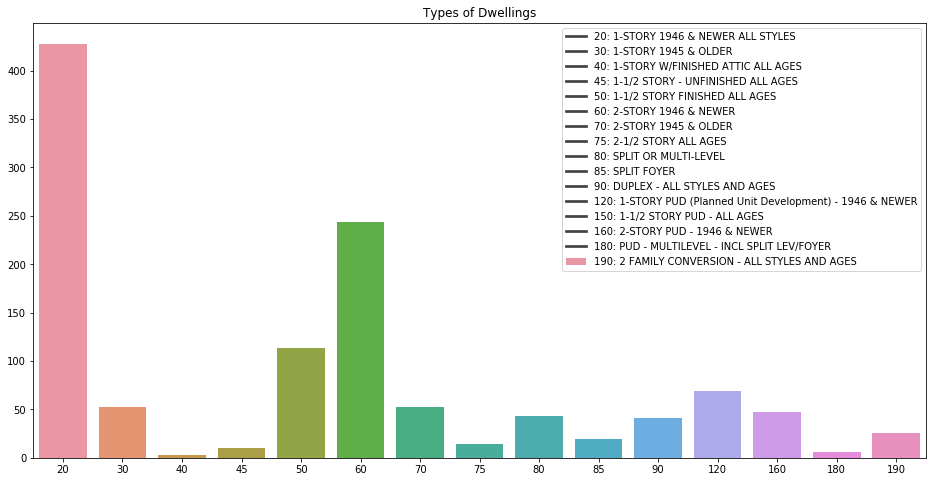

In [8]:
#MSSubClass : Identifies the type of dwelling involved in the sale.
zone = data['MSSubClass'].value_counts()
plt.figure(figsize=(16,8))
sns.barplot(zone.index,zone.values)
plt.title("Types of Dwellings")
plt.legend(["20: 1-STORY 1946 & NEWER ALL STYLES", 
            "30: 1-STORY 1945 & OLDER",
            "40: 1-STORY W/FINISHED ATTIC ALL AGES",
            "45: 1-1/2 STORY - UNFINISHED ALL AGES",
            "50: 1-1/2 STORY FINISHED ALL AGES",
            "60: 2-STORY 1946 & NEWER",
            "70: 2-STORY 1945 & OLDER",
            "75: 2-1/2 STORY ALL AGES",
            "80: SPLIT OR MULTI-LEVEL",
            "85: SPLIT FOYER",
            "90: DUPLEX - ALL STYLES AND AGES",
           "120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
           "150: 1-1/2 STORY PUD - ALL AGES",
           "160: 2-STORY PUD - 1946 & NEWER",
           "180: PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
           "190: 2 FAMILY CONVERSION - ALL STYLES AND AGES"])

    Most of the houses involved in the sale are 1 story building with newer styles.

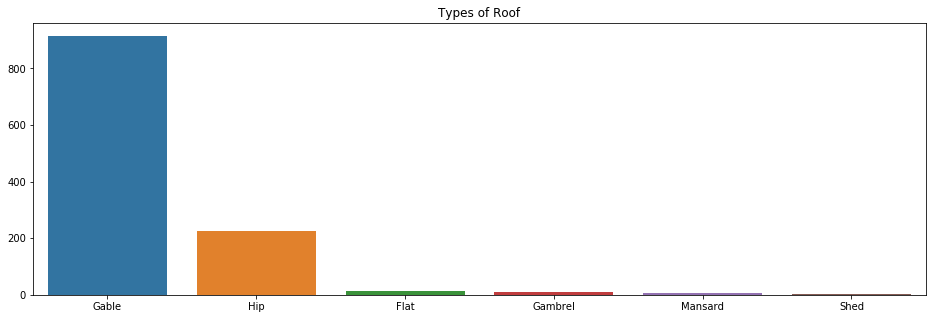

In [9]:
#RoofStyle : Type of Roof
zone = data['RoofStyle'].value_counts()
plt.figure(figsize=(16,5))
plt.title("Types of Roof")
sns.barplot(zone.index,zone.values)


    Most common types of roofs are Gable and Hip

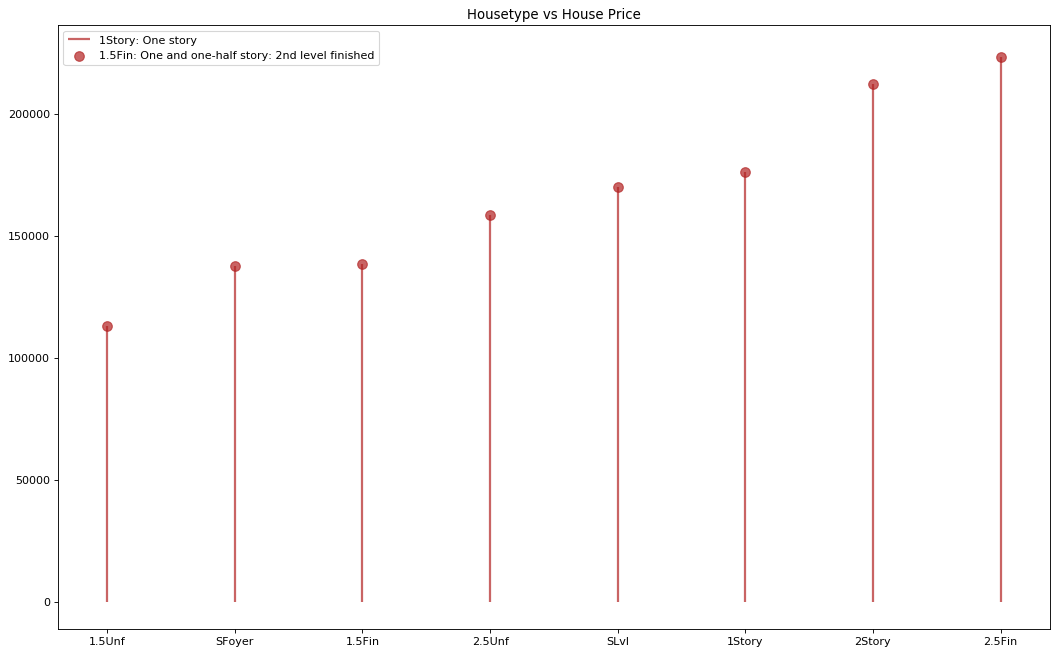

In [10]:
df = data[['HouseStyle','SalePrice']].groupby('HouseStyle').apply(lambda x:x.mean())
df.sort_values('SalePrice',inplace=True)
df.reset_index(inplace=True)
df['SalePrice'] = df['SalePrice'].round(2)


fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.HouseStyle, ymin=0, ymax=df.SalePrice, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.SalePrice, s=75, color='firebrick', alpha=0.7)
plt.title("Housetype vs House Price")
plt.legend(["1Story: One story",
            "1.5Fin: One and one-half story: 2nd level finished",
            "1.5Unf: One and one-half story: 2nd level unfinished",
            "2Story: Two story",
            "2.5Fin: Two and one-half story: 2nd level finished",
            "2.5Unf: Two and one-half story: 2nd level unfinished",
            "SFoyer: Split Foyer",
            "SLvl: Split Level"])

On an average, 1story building was more open for sale, and from this graph we can observe that 1story building costs around 1,75,000. As the house size increase, prices also increase.

Text(0.5, 1.0, 'Prices of Houses in Different Neighborhood')

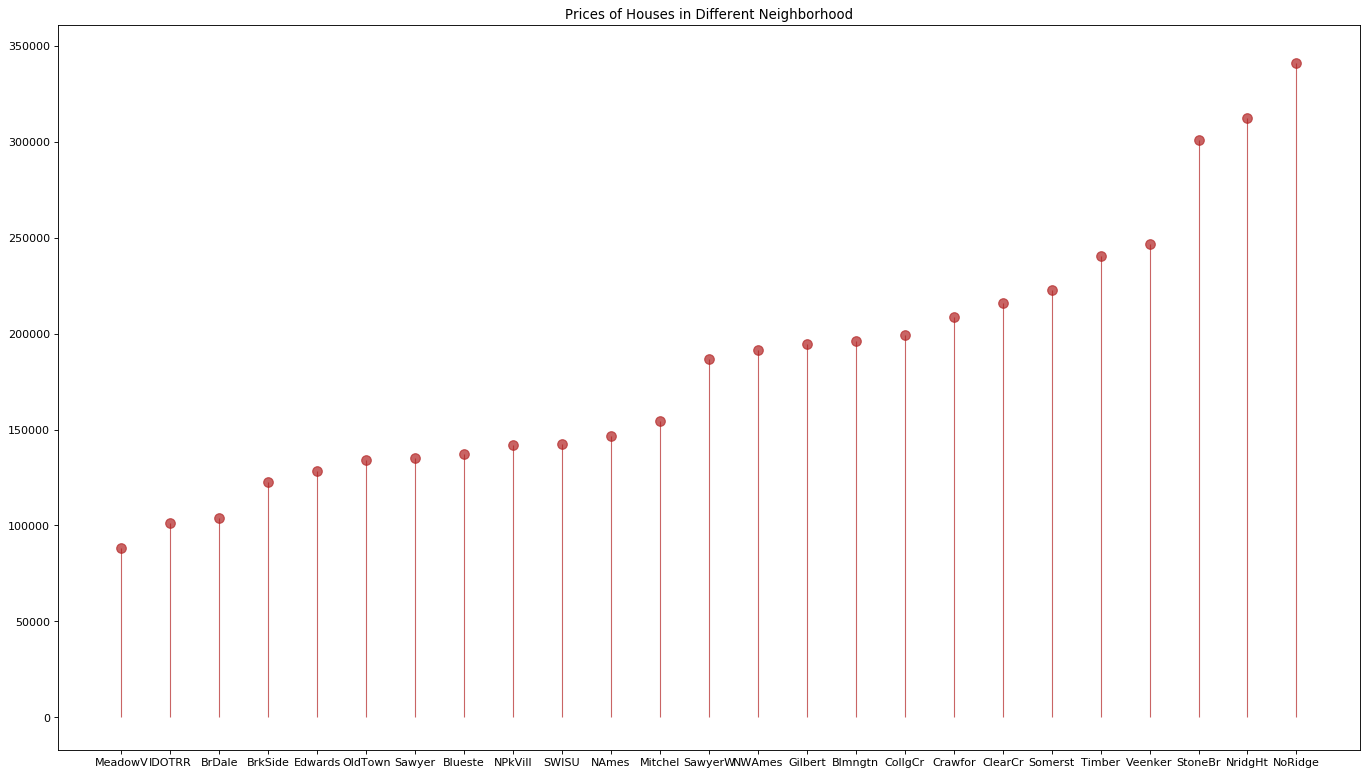

In [11]:
df = data[['Neighborhood','SalePrice']].groupby('Neighborhood').apply(lambda x:x.mean())
df.sort_values('SalePrice',inplace=True)
df.reset_index(inplace=True)
df['SalePrice'] = df['SalePrice'].round(2)


fig, ax = plt.subplots(figsize=(21,12), dpi= 80)
ax.vlines(x=df.Neighborhood, ymin=0, ymax=df.SalePrice, color='firebrick', alpha=0.7, linewidth=1)
ax.scatter(x=df.index, y=df.SalePrice, s=75, color='firebrick', alpha=0.7)
plt.title("Prices of Houses in Different Neighborhood")

    House price in areas like MeadowV, BrDake, BrkSide have cheaper house prices when compared areas like NoRidge,NridgHt.

<Figure size 1280x800 with 0 Axes>

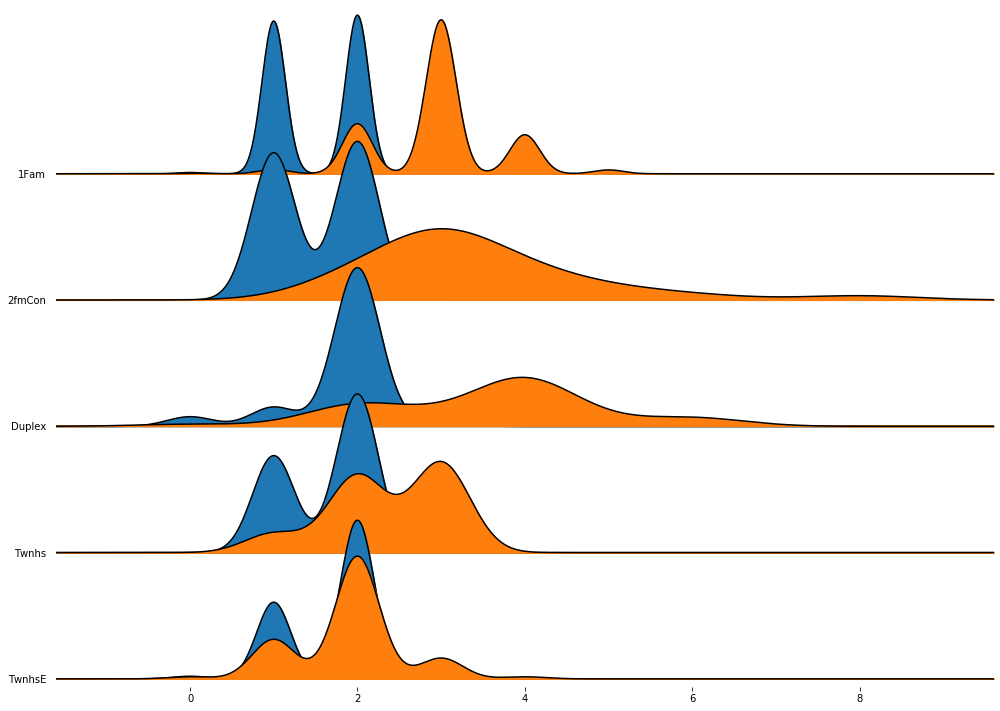

In [12]:
#!pip install joypy
import joypy
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(data, column=['FullBath', 'BedroomAbvGr'], by="BldgType", ylim='own', figsize=(14,10))

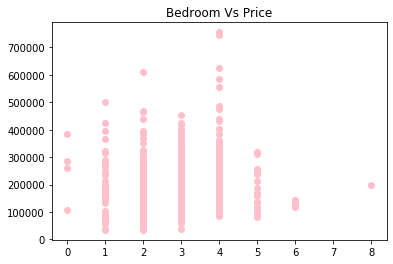

In [13]:
#no of rooms vs price
plt.scatter(data.BedroomAbvGr, data.SalePrice,color='pink')
plt.title("Bedroom Vs Price")
plt.show()


    On an average, 3 bedroom house costs similar to the cost of 1bedroom or 2 bedroom house.

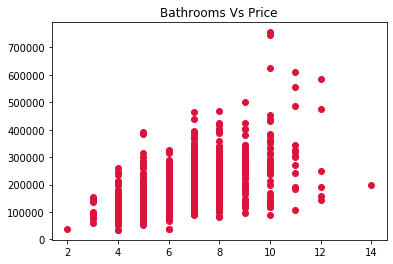

In [14]:
#no of bathrooms vs price
plt.scatter(data.TotRmsAbvGrd, data.SalePrice,color='crimson')
plt.title("Bathrooms Vs Price")
plt.show()

    Cost for 6-10 bathrooms in a building cost same, ranging between 1,00,000 and 5,00,000.

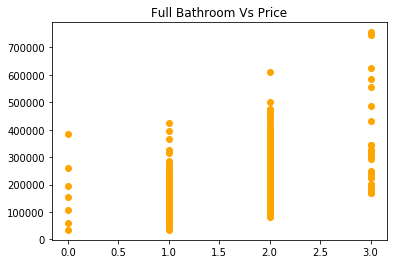

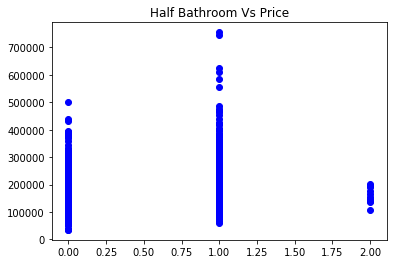

In [15]:
#no of bathroom vs price
plt.scatter(data.FullBath, data.SalePrice,color='orange')
plt.title("Full Bathroom Vs Price")
plt.show()

plt.scatter(data.HalfBath, data.SalePrice,color='blue')
plt.title("Half Bathroom Vs Price")
plt.show()

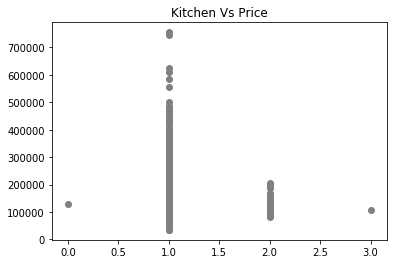

In [16]:
plt.scatter(data.KitchenAbvGr, data.SalePrice,color='grey')
plt.title("Kitchen Vs Price")
plt.show()

    Most commonly, only 1 kitchen is there per house and the cost can range anywhere between 1,00,000 and 7,00,000.

Text(0.5, 1, 'Over quality of the house vs Sale Price')

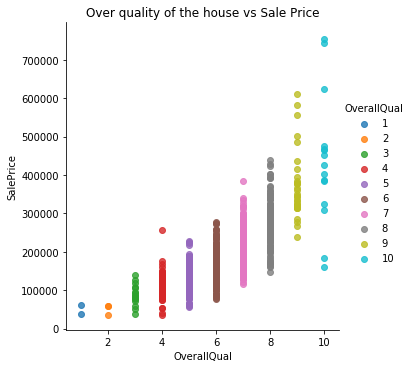

In [17]:
sns.lmplot('OverallQual','SalePrice',data=data,hue='OverallQual')
plt.title("Over quality of the house vs Sale Price")

Text(0.5, 1.0, 'House Price vs Year built in')

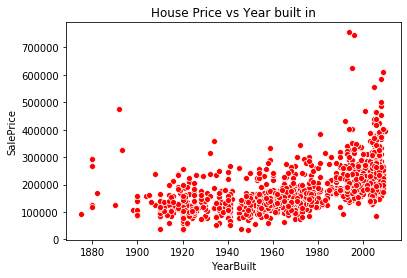

In [18]:
sns.scatterplot(data.YearBuilt,data.SalePrice,color='Red')
plt.title("House Price vs Year built in")

    There is a linear relationship between the price of the house and the year which it was built in. 
    The cost of house price increases everyday based on the needs and demands of people.

Text(0.5, 1.0, 'House Price vs Year in which it was rennovated')

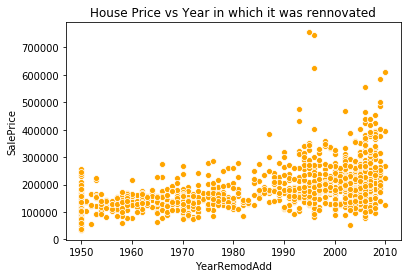

In [19]:
sns.scatterplot(data.YearRemodAdd,data.SalePrice,color='Orange')
plt.title("House Price vs Year in which it was rennovated")

Text(0.5, 1.0, 'Prices of the house based on the garage built year')

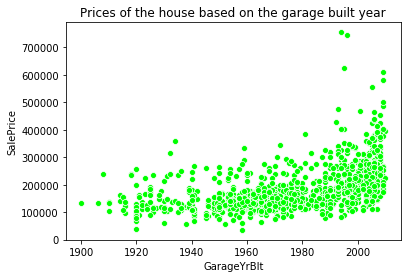

In [20]:
sns.scatterplot(data.GarageYrBlt,data.SalePrice,color='lime')
plt.title("Prices of the house based on the garage built year")

In [21]:
data['Utilities'].value_counts()
#Since all rows have same values, this column can be removed.

AllPub    1168
Name: Utilities, dtype: int64

In [22]:
data['Alley'].value_counts()
#This column doesnt give much information. Hence we will remove this column as well.

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [23]:
data['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [24]:
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [25]:
data['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [26]:
data['MiscFeature'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [27]:
data['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [28]:
data['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [29]:
data['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [30]:
data['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [31]:
data['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [32]:
data['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [33]:
data['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [34]:
data['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [35]:
data['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [36]:
data['GarageYrBlt'].value_counts()

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1927.0     1
1933.0     1
1908.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [37]:
data['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [38]:
data['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

In [39]:
data['MasVnrArea'].value_counts()

0.0      692
72.0       7
120.0      6
180.0      6
106.0      5
        ... 
443.0      1
105.0      1
894.0      1
650.0      1
567.0      1
Name: MasVnrArea, Length: 283, dtype: int64

In [40]:
#Clean the data based on our observations
def clean_data(data):
    data.drop('Id',axis=1,inplace=True)
    data.drop('Utilities',axis=1,inplace=True)
    #Month Sold is not required
    data.drop('MoSold',axis=1,inplace=True)
    #We can drop this column as it does not provide us much information.
    data.drop('PoolQC', axis=1,inplace=True)
    data.drop('PoolArea',axis=1,inplace=True)

    #Assumption 1: Alley has NaN values wich have been changed to NA --> No Alley Access
    data['Alley'].replace(np.NaN,'No Alley Access',inplace=True)

    #Assumption 2 : FireplaceQu has NaN hich have been changed to NA -- > No Fireplace
    data['FireplaceQu'].replace(np.NaN,'No Fireplace',inplace=True)

    #Assumption 3 : Fence has NaN hich have been changed to NA -- > No Fence
    data['Fence'].replace(np.NaN,'No Fence',inplace=True)

    #Assumption 4 : MiscFeature has NaN hich have been changed to NA -- > None
    data['MiscFeature'].replace(np.NaN,'None',inplace=True)

    #Assumption 5 : MasVnrType has NaN hich have been changed to -- > None
    data['MasVnrType'].replace(np.NaN,'None',inplace=True)

    #Assumption 6 : BsmtQual has NaN hich have been changed to NA -- > No Basement
    data['BsmtQual'].replace(np.NaN,'NA',inplace=True)

    #Assumption 7 : BsmtCond has NaN hich have been changed to NA -- > No Basement
    data['BsmtCond'].replace(np.NaN,'NA',inplace=True)

    #Assumption 8 : MasVnrType has NaN hich have been changed to NA --> No Basement
    data['BsmtExposure'].replace(np.NaN,'NA',inplace=True)

    #Assumption 9 : BsmtFinType1 has NaN hich have been changed to NA --> No Basement
    data['BsmtFinType1'].replace(np.NaN,'NA',inplace=True)

    #Assumption 10 : BsmtFinType2 has NaN hich have been changed to NA --> No Basement
    data['BsmtFinType2'].replace(np.NaN,'NA',inplace=True)

    #Assumption 11 : GarageType has NaN hich have been changed to NA --> No Garage
    data['GarageType'].replace(np.NaN,'NA',inplace=True)

    #Assumption 12 : GarageFinish has NaN hich have been changed to NA --> No Garage
    data['GarageFinish'].replace(np.NaN,'NA',inplace=True)

    #Assumption 13 : GarageQual has NaN hich have been changed to NA --> No Garage
    data['GarageQual'].replace(np.NaN,'NA',inplace=True)

    mean_garage_quality = data['GarageYrBlt'].mean()
    data['GarageYrBlt'].replace(np.NaN,mean_garage_quality,inplace=True)

    #Assumption 14 : GarageCond has NaN hich have been changed to NA --> No Garage
    data['GarageCond'].replace(np.NaN,'NA',inplace=True)

    mean_lotFrontage = data['LotFrontage'].mean()
    data['LotFrontage'].replace(np.NaN,mean_lotFrontage,inplace=True)

    mean_veneerArea = data['MasVnrArea'].mean()
    data['MasVnrArea'].replace(np.NaN,mean_veneerArea,inplace=True)
    data['MasVnrArea'] = data['MasVnrArea'].astype('int')
    
    return data
data = clean_data(data)

In [41]:
#Encode all the columns which has object data type:
from sklearn.preprocessing import LabelEncoder

def encodeLabeler(data):
    encoder = LabelEncoder()

    df = data.select_dtypes(include='object')
    col = df.columns
    for each in col:
        data[each] = encoder.fit_transform(data[each])
    return data
data = encodeLabeler(data)

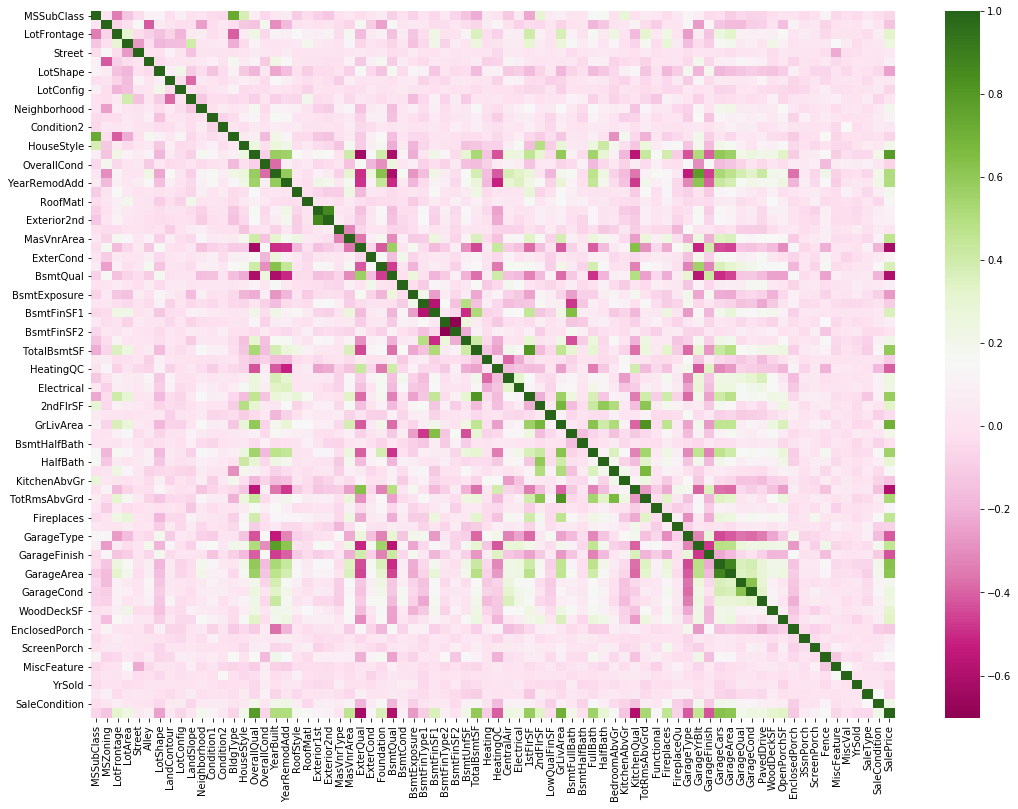

In [42]:
#Find correlation between variables:
plt.figure(figsize=(18,13))
sns.heatmap(data.corr(),cmap='PiYG')

In [68]:
correlation = pd.DataFrame(data[data.columns[:]].corr()['SalePrice'][:])
correlation.sort_values(by='SalePrice',ascending=False,inplace=True)
print("Columns having high correlation with Target Variable ( Sale Price ) : ")
correlation[65:]

Columns having high correlation with Target Variable ( Sale Price ) : 


,SalePrice
EnclosedPorch,-0.115004
KitchenAbvGr,-0.132108
MSZoning,-0.133221
LotShape,-0.248171
BsmtExposure,-0.267635
HeatingQC,-0.406604
GarageType,-0.415370
GarageFinish,-0.424922
KitchenQual,-0.592468
BsmtQual,-0.601307


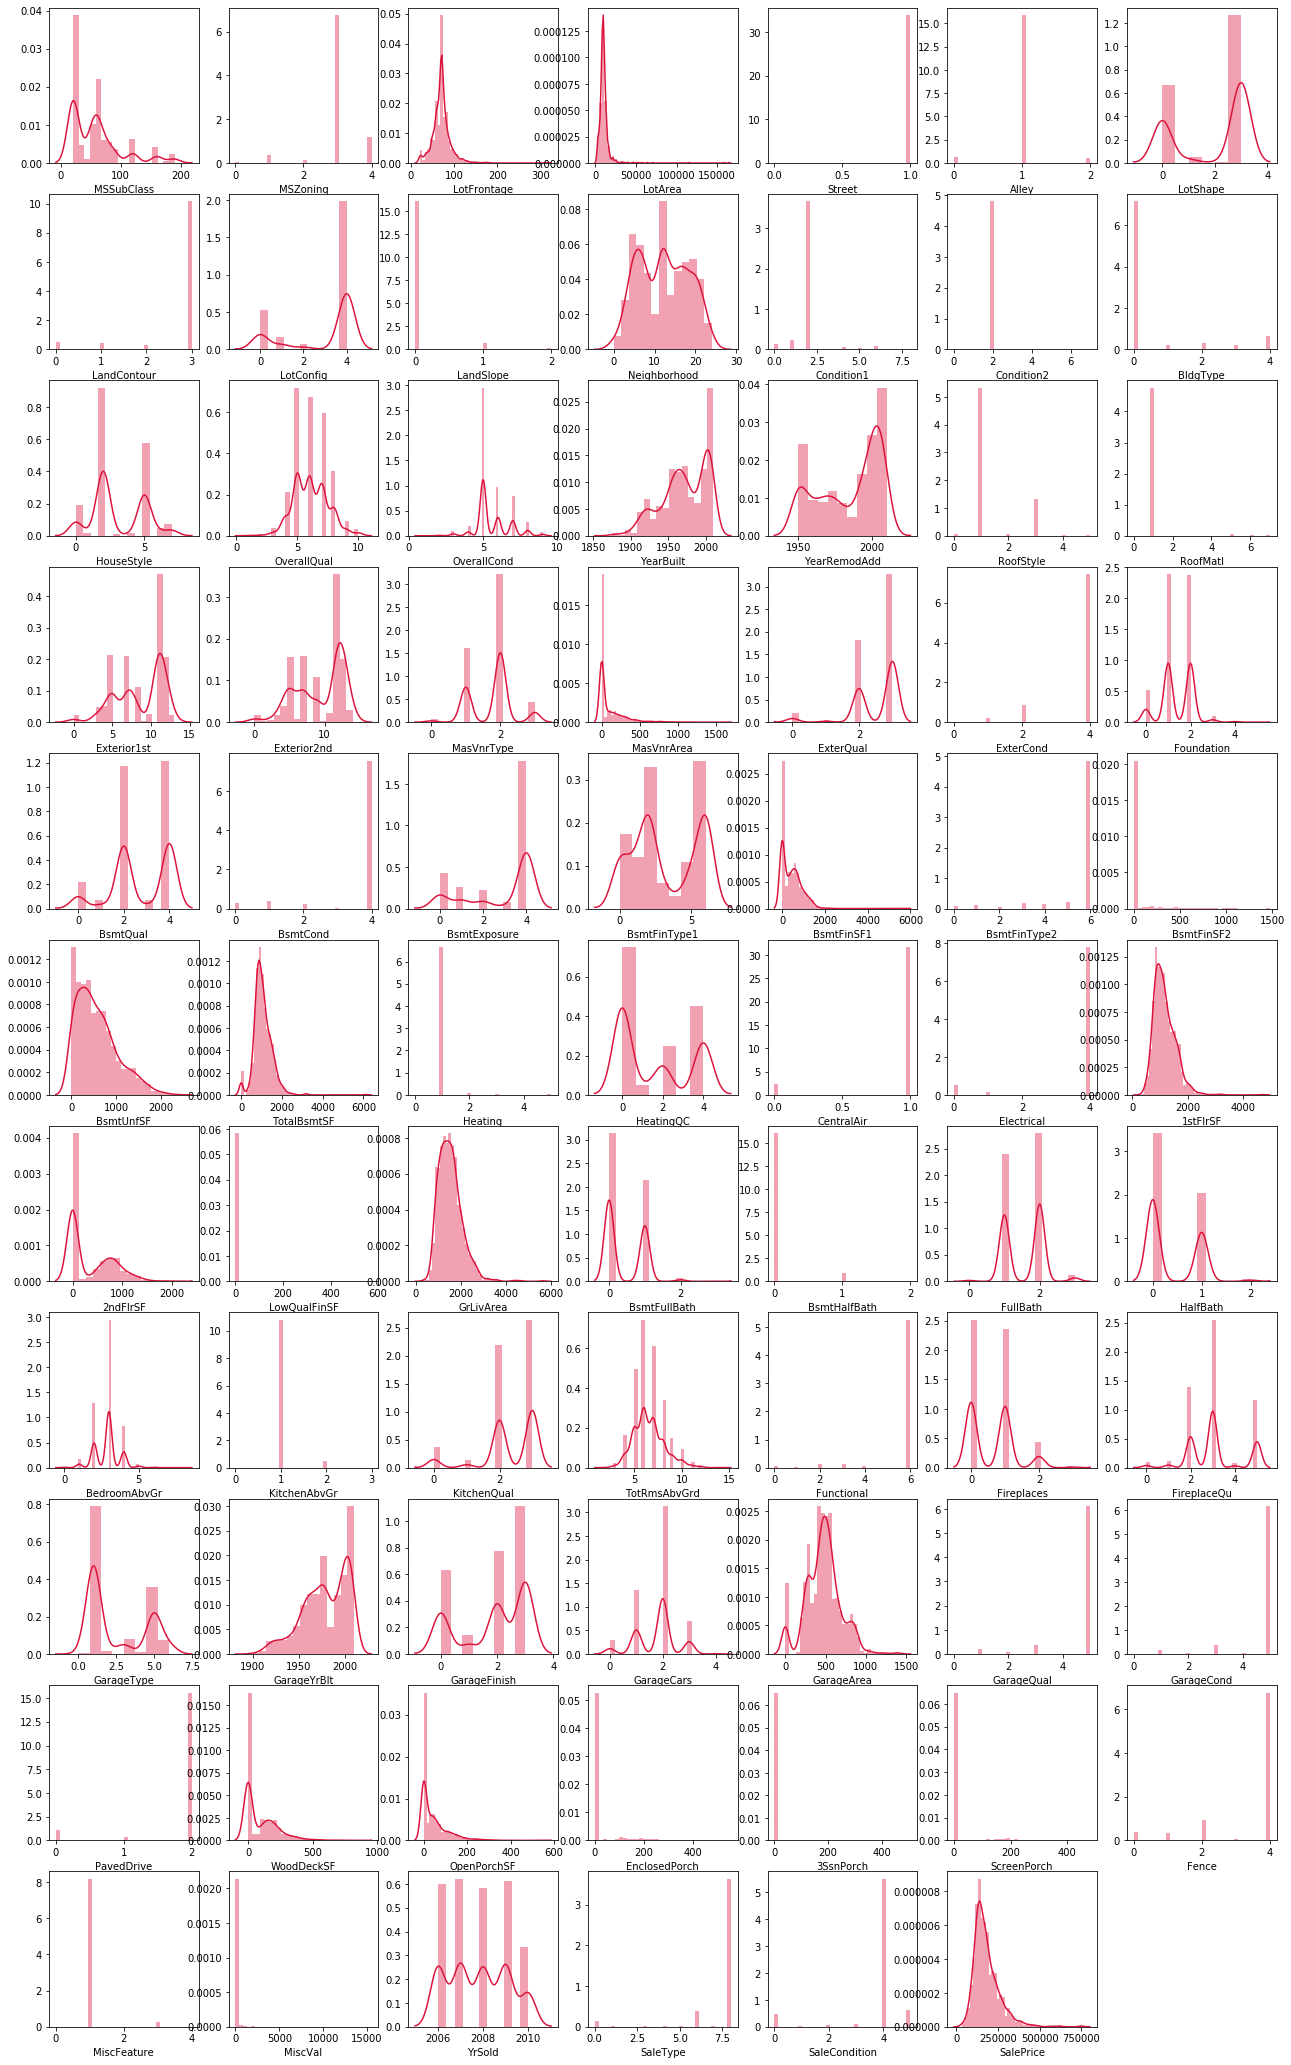

In [44]:
#To check for skewness :
col = data.columns.values
plt.figure(figsize=(22,260))
for i in range(0,len(col)):
    plt.subplot(76,7,i+1)
    sns.distplot(data[col[i]],color='crimson')
plt.show()

    It appears that almost all columns are uniformly distributed. Very less skewness occurs in columns like : BmstUnfSF,     GrLivArea, lstFlrSF

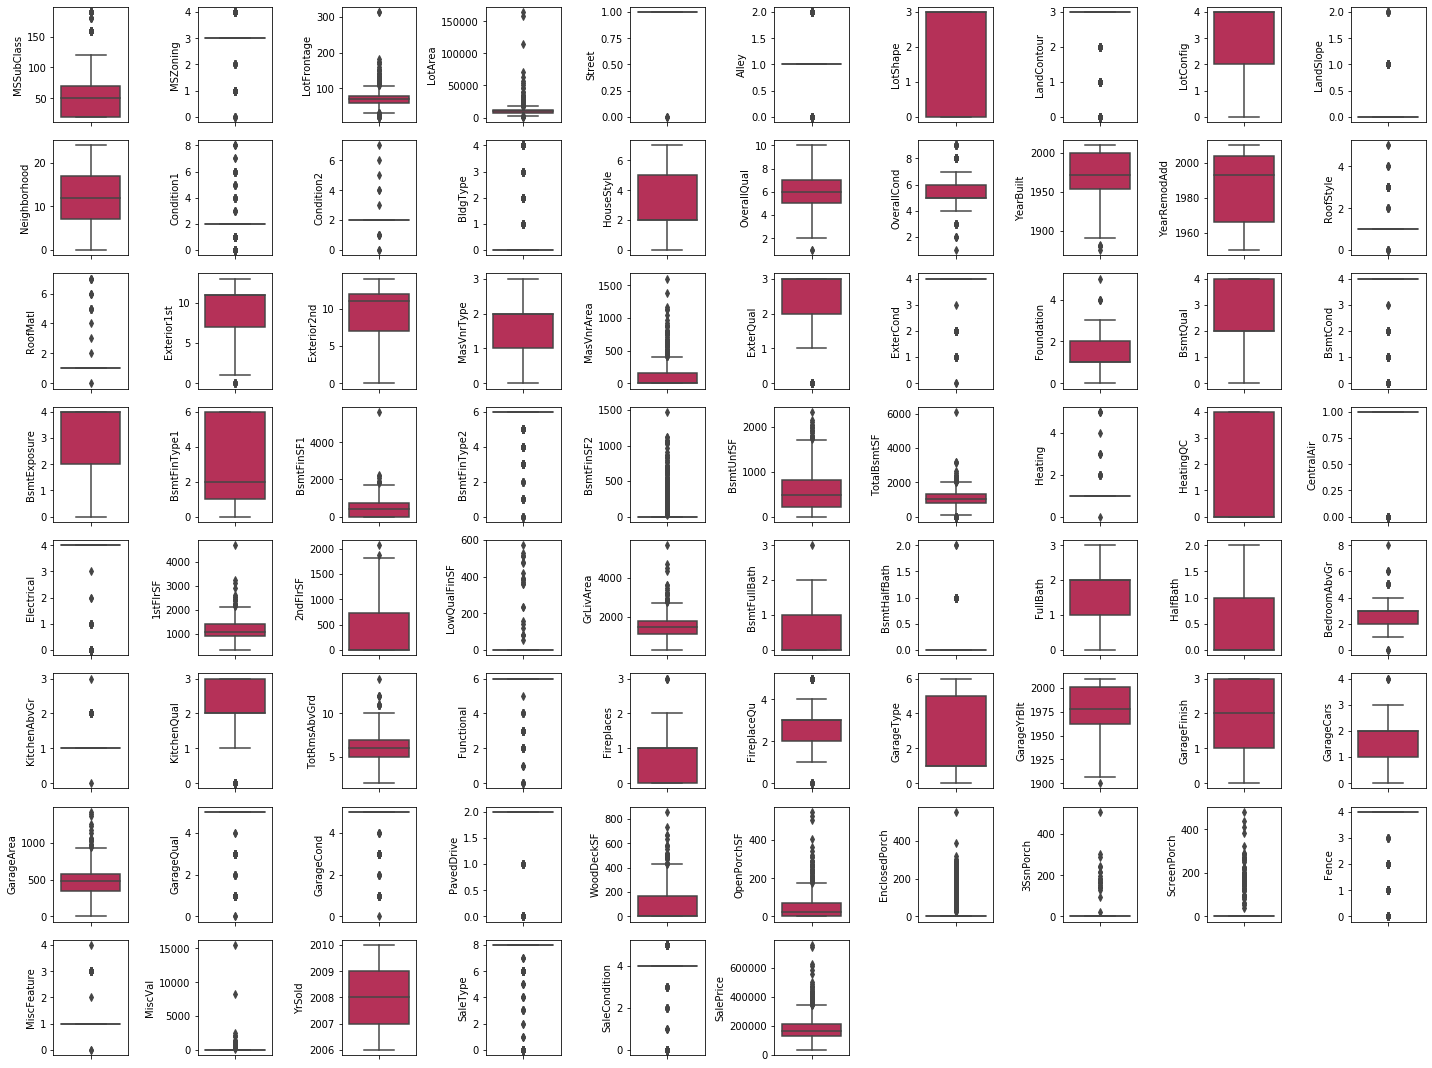

In [45]:
#Check for outliers :
plt.figure(figsize=(20,150))
for i in range(0,len(col)):
    plt.subplot(81,10,i+1)
    sns.boxplot(data[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

In [46]:
#Split the training data into X and y : 
from sklearn.model_selection import train_test_split

X = data.drop('SalePrice',axis=1)
y = data.iloc[:,-1:]

In [47]:
#We need to scale the data before using PCA : 
from sklearn.preprocessing import MinMaxScaler
def scale_data(data):
    scaler = MinMaxScaler()
    X_rescaled = pd.DataFrame(scaler.fit_transform(data))
    return X_rescaled
X_rescaled = scale_data(X)

In [48]:
#Since there are a large number of columns present in the dataset, we need to reduce them and take only those columns 
#which have high correlation with the target variable.

from sklearn.decomposition import PCA

def apply_pca(data):
    pca = PCA(n_components = 0.95)
    pca.fit(data)
    X_reduced = pd.DataFrame(pca.transform(data))
    return X_reduced
X_reduced = apply_pca(X_rescaled)

In [49]:
X_reduced

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.054068,0.586990,-0.398778,0.605694,-0.024671,-0.527374,-0.392060,0.679138,-0.316599,0.179911,...,0.083669,-0.249014,-0.145205,0.120261,-0.012682,-0.085523,0.126988,0.056271,0.018939,0.043122
1,0.338138,0.608975,-0.006246,-0.513024,0.606692,-0.323830,0.194163,-0.263844,-0.498352,0.018284,...,-0.211885,-0.037141,-0.242540,0.205462,0.094552,-0.051305,0.318471,0.644707,-0.005516,-0.017049
2,0.787819,0.779762,0.116620,0.198424,0.080078,0.317027,0.237942,-0.189622,-0.617471,-0.169006,...,-0.164781,0.014180,0.093466,-0.199021,-0.135708,0.216820,0.023528,-0.013221,0.016394,0.051476
3,0.278321,0.476586,0.103977,-0.444937,-0.278304,-0.640526,-0.366167,0.004930,0.183455,-0.170142,...,0.164515,-0.209565,0.059762,0.009488,0.019724,-0.215840,0.062470,0.114769,-0.006038,0.007344
4,0.559368,0.786720,0.053692,-0.050001,-0.159810,-0.205085,-0.571732,0.088754,0.633665,0.158528,...,0.249986,-0.300365,0.041624,-0.044003,0.230413,0.102969,-0.149235,-0.108055,-0.092391,0.346462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.854699,0.767447,-0.029594,-0.100384,-0.105512,-0.610916,-0.468770,0.015755,0.107203,-0.451043,...,0.046553,0.085479,-0.110985,-0.061092,-0.083773,-0.060180,-0.029971,0.030811,-0.089115,-0.051185
1164,-0.006020,-0.684830,0.090359,-0.329396,0.401514,0.118615,-0.386419,-0.511359,0.423803,0.086710,...,0.327347,0.068493,-0.130608,0.167467,0.032116,-0.089025,-0.152714,0.072117,0.087184,0.076577
1165,-0.330578,0.297531,-0.699563,0.811022,-0.796636,0.306315,-0.176247,0.161269,-0.163190,-0.248476,...,0.118289,-0.205388,-0.030184,-0.044049,0.074398,-0.037581,0.008378,-0.081420,-0.030038,-0.009610
1166,-1.642387,-0.373013,0.239060,0.707597,0.179699,0.012004,0.099337,-0.188062,0.474269,-0.195070,...,-0.512391,-0.145944,0.145027,0.350885,0.324858,-0.341686,0.012542,-0.266967,-0.257458,0.057441


# Model Development and Evaluation

In [50]:
#An Algorithm to calculate best random state for various algorithms.
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,200):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state


In [51]:
#Train the model with various types of regression models : 
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


model = [LR(),DTR(),KNR(),RFR(),SVR(),Lasso(),Ridge(),ElasticNet()]

for i in range(len(model)):
    x_train,x_test,y_train,y_test = train_test_split(X_reduced,y,test_size=.20,random_state=135)
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    r2Score = r2_score(y_test,y_pred)
    
    print("*************************************************************************************")
    print(model[i])
    print("R2 Score : ",r2Score)
    print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))
    print("")
    print("*************************************************************************************")


*************************************************************************************
LinearRegression()
R2 Score :  0.8519973765147913
Mean Absolute Error :  21809.810568936606
Mean Squared Error :  1126938460.7104385
Root Mean Squared Error :  33569.90409146917

*************************************************************************************
*************************************************************************************
DecisionTreeRegressor()
R2 Score :  0.5399611850996714
Mean Absolute Error :  40426.717948717946
Mean Squared Error :  3502880028.2222223
Root Mean Squared Error :  59185.13350683787

*************************************************************************************
*************************************************************************************
KNeighborsRegressor()
R2 Score :  0.730816945444434
Mean Absolute Error :  29110.92393162393
Mean Squared Error :  2049644323.9095726
Root Mean Squared Error :  45272.99773495867

***************************

In [52]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

for i in range(len(model)):
    cv_score = cross_val_score(model[i],X_reduced,y,cv=5,scoring='r2')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")


*************************************************************************************
Score for  LinearRegression()  : 
Score :  [0.82311061 0.77037598 0.68394181 0.82926597 0.79731995]
Mean :  0.7808028621259954
Standard Deviation :  0.05272990912396645
*************************************************************************************

*************************************************************************************
Score for  DecisionTreeRegressor()  : 
Score :  [0.53941232 0.58145675 0.38182445 0.41599828 0.48875195]
Mean :  0.48148875132883323
Standard Deviation :  0.07432828543541332
*************************************************************************************

*************************************************************************************
Score for  KNeighborsRegressor()  : 
Score :  [0.70870675 0.68908021 0.7165888  0.73989637 0.66084807]
Mean :  0.7030240389493103
Standard Deviation :  0.026642475462329358
***************************************************

Ridge Regression model is performing the best amongst all other models, hence we will use this as final model.

In [53]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [54]:
from sklearn.model_selection import GridSearchCV

model = Ridge()
parameters = {'alpha':[1, 10],
              'random_state':range(120,150)}
Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=5,n_jobs=-1,pre_dispatch=2)
Ridge_reg.fit(X_reduced,y)
print(Ridge_reg.best_estimator_)

Ridge(alpha=10, random_state=120)


In [55]:
Ridge_reg.best_params_

{'alpha': 10, 'random_state': 120}

In [56]:
# best model
best_model = Ridge_reg.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(X_reduced,y,test_size=.20,random_state = 135)
best_model.fit(x_train,y_train)
score = best_model.score(x_train,y_train)
print("Score for Ridge regression : ",score)
y_pred = best_model.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print("R2 Score for Ridge Regression : ",r2Score)
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

Score for Ridge regression :  0.7834373153342951
R2 Score for Ridge Regression :  0.8425566571065772
Mean Squared Error :  1198823063.478681
Mean Absolute Error :  21802.398299775392
Root Mean Squared Error :  34624.024368618404


In [57]:
X_reduced.shape

(1168, 43)

In [58]:
y_test.head()

,SalePrice
234,120000
389,140000
737,172500
790,244600
558,88000


In [59]:
y_pred[0:5]

array([[152186.48939526],
       [172762.18432204],
       [172973.4202725 ],
       [247364.96770429],
       [ 79970.76390157]])

In [60]:
#Lets boost the model and see if it gives a better score :
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR

ada = ABR(n_estimators=20)
gradient = GBR(n_estimators=20)
rfr = RFR(n_estimators=20)

state1 = calBestRandomStateOf(ada)
state2 = calBestRandomStateOf(gradient)

ada = ABR(n_estimators=20,random_state=state1)
gradient = GBR(n_estimators=20,random_state=state2)

boosting_model = [ada,gradient]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    r2Score = r2_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("R2 Score : ", r2Score)
    print("\n")

-----------------------------------------------------------
AdaBoostRegressor(n_estimators=20, random_state=107)
-----------------------------------------------------------
R2 Score :  0.702517943308065


-----------------------------------------------------------
GradientBoostingRegressor(n_estimators=20, random_state=107)
-----------------------------------------------------------
R2 Score :  0.7222039904913273




In [61]:
#Even after boosting, Ridge regression is giving the best results, hence we will use this model to predict values for test data.

test_data = pd.read_csv('test.csv')
test_data = clean_data(test_data)
test_data = encodeLabeler(test_data)
test_data = scale_data(test_data)
test_data = apply_pca(test_data)

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.694486,0.574929,0.450312,-0.457160,0.108636,0.516136,0.043195,-0.068515,-0.122001,0.297091,...,0.013469,-0.042618,0.148940,-0.014354,0.092620,-0.039998,-0.039688,-0.044881,-0.053414,-0.068675
1,0.565980,1.059760,-0.431035,0.016369,0.702814,0.823448,-0.132429,-0.446473,-0.316089,-0.670086,...,0.358976,0.143099,0.117471,0.144129,0.158948,-0.067412,0.052400,-0.198675,0.242733,-0.138852
2,0.859044,-0.749598,0.103415,-0.607489,-0.348505,0.275891,-0.558385,-0.310780,-0.135517,-0.186109,...,0.231853,-0.196057,0.095504,-0.079933,-0.148147,-0.089893,-0.189187,0.053588,-0.145514,-0.046699
3,-0.518114,-0.396911,0.289804,0.150112,-0.350525,-0.138401,0.171078,-0.144590,0.640547,-0.249550,...,-0.182899,-0.017343,0.027724,-0.027136,0.122381,-0.041168,-0.188992,-0.066326,0.091623,-0.048197
4,1.096549,-0.407733,0.825864,0.525179,0.393931,0.296582,0.189846,-0.002262,-0.051576,0.038242,...,-0.014136,0.102922,0.117643,-0.113456,0.122259,-0.081278,-0.042342,-0.011076,-0.088667,0.012735


In [62]:
test_data.shape

(292, 43)

In [63]:
pred_test_data = best_model.predict(test_data)
pred_test_data

array([[312817.80746309],
       [211548.88159137],
       [203641.30930772],
       [178924.94341661],
       [253254.84851003],
       [132290.60595682],
       [151754.82733532],
       [259535.53820414],
       [222781.10150983],
       [219769.2587521 ],
       [108911.36457563],
       [124005.01524748],
       [176237.15867204],
       [139983.91363179],
       [205621.17656933],
       [155834.74058159],
       [185224.15189683],
       [114788.00491957],
       [250648.55854589],
       [243626.59848422],
       [180038.22073597],
       [176880.90020829],
       [130414.48906855],
       [160284.43127471],
       [ 38146.89630618],
       [122450.04373095],
       [172239.42645594],
       [130971.95123134],
       [164153.04680232],
       [ 68798.64619499],
       [109827.53298387],
       [223065.15816421],
       [235625.33997218],
       [186546.26488415],
       [132238.12613069],
       [192991.18328449],
       [265134.29932532],
       [ 98832.75821706],
       [1378

In [64]:
pd.DataFrame(pred_test_data).to_csv("House_Price_Predictions.csv")